<a href="https://colab.research.google.com/github/joshuabenedict-665/Body_Transformation_Tracker/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving a.png to a.png
Saving b.png to b.png
ℹ️ Resizing image2 to match image1...
✅ Displaying results:


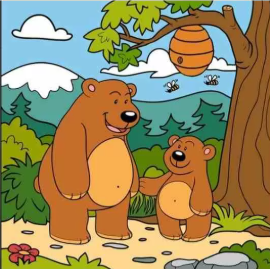

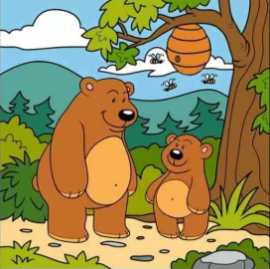

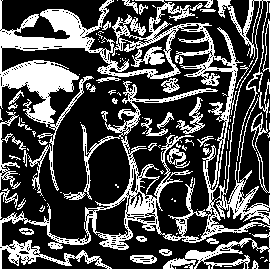

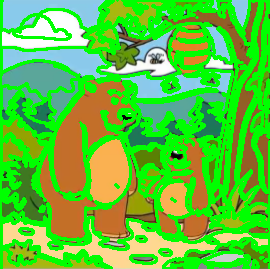

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

def compute_absdiff(img1, img2):
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    diff = cv2.absdiff(gray1, gray2)
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    return thresh

def get_contours(diff_img):
    contours, _ = cv2.findContours(diff_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def draw_highlighted_differences(original_img, contours):
    highlighted = original_img.copy()
    cv2.drawContours(highlighted, contours, -1, (0, 255, 0), 2)
    return highlighted

def visualize_image_difference(img1_path, img2_path):
    # Load images
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    if img1 is None or img2 is None:
        print("❌ One or both images not found.")
        return

    if img1.shape != img2.shape:
        print("ℹ️ Resizing image2 to match image1...")
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    diff_thresh = compute_absdiff(img1, img2)
    contours = get_contours(diff_thresh)
    result_img = draw_highlighted_differences(img2, contours)

    print("✅ Displaying results:")
    cv2_imshow(img1)
    cv2_imshow(img2)
    cv2_imshow(diff_thresh)
    cv2_imshow(result_img)

uploaded = files.upload()

uploaded_filenames = list(uploaded.keys())
if len(uploaded_filenames) < 2:
    print("❌ Please upload exactly two images.")
else:
    image1_path = uploaded_filenames[0]
    image2_path = uploaded_filenames[1]
    visualize_image_difference(image1_path, image2_path)